Adam Goldenberg
Comp Phy HW 2
Python 3 Code

In [95]:
#Sine Approximation
#Perform the exercises described in S3.3.1 of Landau (pg. 66). 
#Hint: Consider the pseu-docode on pg. 52 for writing the sine program.

#Part 1, write the program that calulates sin(x) by sums

import numpy as np
import math
import matplotlib.pyplot as plt

def sin(x, n):
    if(n == 1):
        return x
    term = x
    sum = x
    esp = 10e-7
    term = -term * x * x / (2 * n + 1) / (2 * n - 2)
    sum = sum + term
    while(abs(term/sum) > esp):
        term = -term * x * x / (2 * n + 1) / (2 * n - 2)
        sum = sum + term
    return sum

#Part 2, Calculate your series for x ≤ 1 and compare it to the built-in function Math.sin(x)
for i in range(1,10):
    x = i/10
    print("Math sin(" + str(x) + ") = " + str(math.sin(x)) + " Summation sin(" + str(x) + ") = " + str(sin(x,5)))

Math sin(0.1) = 0.09983341664682815 Summation sin(0.1) = 0.09998863765495868
Math sin(0.2) = 0.19866933079506122 Summation sin(0.2) = 0.19990913223140497
Math sin(0.3) = 0.29552020666133955 Summation sin(0.3) = 0.2996934952885812
Math sin(0.4) = 0.3894183423086505 Summation sin(0.4) = 0.3992740471825695
Math sin(0.5) = 0.479425538604203 Summation sin(0.5) = 0.4985835693726228
Math sin(0.6) = 0.5646424733950354 Summation sin(0.6) = 0.5975554547896318
Math sin(0.7) = 0.644217687237691 Summation sin(0.7) = 0.6961238551337398
Math sin(0.8) = 0.7173560908995228 Summation sin(0.8) = 0.7942238244928626
Math sin(0.9) = 0.7833269096274834 Summation sin(0.9) = 0.8917914585237545


This produces various sin values for x <= 10. Here we can see that the summation value for sin(x) is consistently larger than the actual value of sin(x). It should be noted that incrementing or decrementing n during the summation did not actually change the value of the summation. The textbook code uses a while loop that stops the summation after a small enough term. As such it is unclear what n refers to but seems to adjust the accuracy of the summation. The most accurate for these numbers seams to be around n = 5, so that value is used.

In [121]:
#Part 3, Examine the terms in the series for x ≃ 3π and observe the significant subtractive cancelations that occur 
#when large terms add together to give small answers. (Do not use the identity sin ( x + 2π ) = sin x to reduce the 
#value of x in the series.) In particular, print out the near-perfect cancelation around n ≃ x ∕ 2. 

def sinN(x, n):
    if(n == 1):
        return x
    term = x
    sum = x
    esp = 10e-7
    for i in range(0,n-1):
        term = -term * x * x / (2 * (n-i) + 1) / (2 * (n-i) - 2)
        print("N = " + str(n-i) + ", term = " + str(term) + ", sum = " + str(sum))
        sum = sum + term
    return sum
print("Actual value = " + str(math.sin(3*math.pi)) + "\n")
print("Using modified code")
sinN(3*(math.pi), 10)
print("\nUsing textbook code\nFor n = 3*(pi)/2 = " + str(sin(3*math.pi, 3*math.pi/2)))
for i in range(1,10):
    print("n = " + str(i) + ", " + str(sin(3*math.pi, i)))

Actual value = 3.6739403974420594e-16

Using modified code
N = 10, term = -2.214734048592844, sum = 9.42477796076938
N = 9, term = 0.6471280928260179, sum = 7.210043912176536
N = 8, term = -0.2415213632656221, sum = 7.857172005002553
N = 7, term = 0.11918601549217428, sum = 7.615650641736932
N = 6, term = -0.08143745698037545, sum = 7.734836657229106
N = 5, term = 0.08220226539140169, sum = 7.653399200248731
N = 4, term = -0.1352173067144156, sum = 7.735601465640133
N = 3, term = 0.42895971175244324, sum = 7.600384158925717
N = 2, term = -3.810296393101742, sum = 8.02934387067816

Using textbook code
For n = 3*(pi)/2 = inf
n = 1, 9.42477796076938
n = 2, -inf
n = 3, inf
n = 4, inf
n = 5, inf
n = 6, 5.5990563625065075
n = 7, 6.31061339195689
n = 8, 6.863266140399873
n = 9, 7.2936353956675415


This changes the textbook code to sum over n terms. The n = 1 term is accounted for in the fact that term and sum are initially equal to x. n = x/2 would be about n = 5. Here we can see that the term is 0.08220226539140169. which is smaller then the other terms. The n = 6 term is close but in the negitive direction, thus this would produce a large error from there addition. When using the textbook code with n = 3*(pi)/2, it outputs inf or the answer is to large to hold. The textbook code seams to have much more extreem errors as it outputs inf for a number of values for n and the summation is further away as more terms for n are included, but both have significant errors as they are off from the actual value by orders of magnatude.

In [125]:
#Part 4 See if better precision is obtained by using trigonometric identities to keep 0 ≤ x ≤ π. 

def sinAdj(x):
    while(x >= 2*math.pi):
        x = x - 2*math.pi
    return x

print("By identities, x = " + str(3*math.pi) + " becomes: " + str(sinAdj(3*math.pi)) + "\n")
print("Using modified code")
sinN(sinAdj(3*(math.pi)), 10)
print("\nUsing textbook code\nFor n = 3*(pi)/2 = " + str(sin(sinAdj(3*math.pi), 3*math.pi/2)))
for i in range(1,10):
    print("n = " + str(i) + ", " + str(sin(sinAdj(3*math.pi), i)))

By identities, x = 9.42477796076938 becomes: 3.141592653589793

Using modified code
N = 10, term = -0.08202718698492015, sum = 3.141592653589793
N = 9, term = 0.0026630785713004854, sum = 3.059565466604873
N = 8, term = -0.00011043500835190769, sum = 3.0622285451761737
N = 7, term = 6.055276913690711e-06, sum = 3.062118110167822
N = 6, term = -4.5971682828597407e-07, sum = 3.0621241654447355
N = 5, term = 5.155935490575103e-08, sum = 3.0621237057279074
N = 4, term = -9.423526594354231e-09, sum = 3.0621237572872624
N = 3, term = 3.3216599839078975e-09, sum = 3.062123747863736
N = 2, term = -3.278346999609979e-09, sum = 3.062123751185396

Using textbook code
For n = 3*(pi)/2 = 2.786306256615783
n = 1, 3.141592653589793
n = 2, 1.5811039977503707
n = 3, 2.3228288191482793
n = 4, 2.656130374188219
n = 5, 2.8247804646466945
n = 6, 2.9199128191770196
n = 7, 2.9782895691124858
n = 8, 3.0165015575771594
n = 9, 3.0428055223611365


The identity used subtracts 2(pi) so long as x >= 2(pi). This produces a smaller x but the accuracy is still off. Instead of converging on a number close to 0, this tends to go towards a number around 3. 

In [126]:
#Part 4, By progressively increasing x from 1 to 10, and then from 10 to 100, use your program to determine
#experimentally when the series starts to lose accuracy and when it no longer converges.

for i in range(1,11):
    print("Math sin(" + str(i) + ") = " + str(math.sin(i)) + " Summation sin(" + str(i) + ") = " + str(sin(i,5)))

for i in range(10,101):
    print("Math sin(" + str(i) + ") = " + str(math.sin(i)) + " Summation sin(" + str(i) + ") = " + str(sin(i,5)))

Math sin(1) = 0.8414709848078965 Summation sin(1) = 0.9887640451311813
Math sin(2) = 0.9092974268256817 Summation sin(2) = 1.9130434613880076
Math sin(3) = 0.1411200080598672 Summation sin(3) = 2.7216494519590975
Math sin(4) = -0.7568024953079282 Summation sin(4) = 3.3846152509920113
Math sin(5) = -0.9589242746631385 Summation sin(5) = 3.893805615451527
Math sin(6) = -0.27941549819892586 Summation sin(6) = 4.258065588016823
Math sin(7) = 0.6569865987187891 Summation sin(7) = 4.496349264922815
Math sin(8) = 0.9893582466233818 Summation sin(8) = 4.631580411237571
Math sin(9) = 0.4121184852417566 Summation sin(9) = 4.686388368573057
Math sin(10) = -0.5440211108893698 Summation sin(10) = inf
Math sin(10) = -0.5440211108893698 Summation sin(10) = inf
Math sin(11) = -0.9999902065507035 Summation sin(11) = inf
Math sin(12) = -0.5365729180004349 Summation sin(12) = inf
Math sin(13) = 0.4201670368266409 Summation sin(13) = -inf
Math sin(14) = 0.9906073556948704 Summation sin(14) = inf
Math sin(

The textbook program tends to stop converging when x >= 10. At this point, the summation is inf or -inf. The program tends to lose accuracy as x becomes larger then 1.

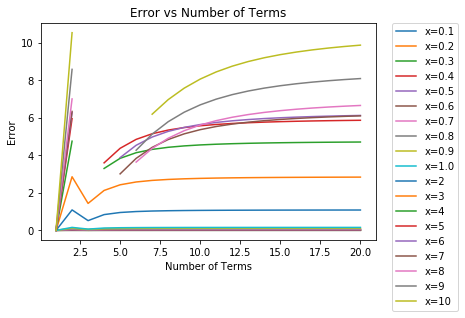

In [137]:
# Part 6, Make a series of graphs of the error vs. N for different values of x . You should get curves similar 
#to those in Figure 3.4.

import matplotlib.pyplot as plt

arr = np.zeros(20)
xaxis = np.arange(1,21)

for i in range(1,20):
    if(i <= 10):
        x = i/10
    else:
        x = i - 9
    for N in range(1,20):
        arr[N] = abs(sin(x,N) - math.sin(x))
    plt.plot(xaxis, arr, label="x="+str(x))
    arr = np.zeros(20)

#Making the plot
plt.xlabel("Number of Terms")
plt.ylabel("Error")
plt.title("Error vs Number of Terms")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

From this we can see that the error is low for all values of N if x is less then or equal to 1. Once x becomes larger, then the error increases drastically and goes to infinity at x >= 4 for some values of N.

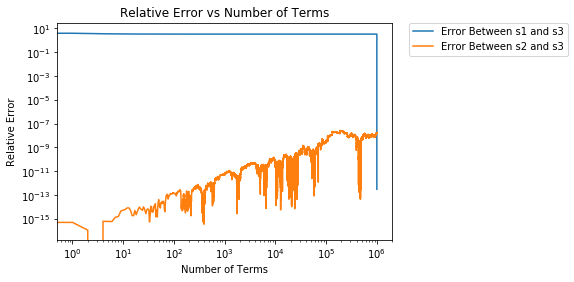

In [38]:
#Optimal Summations
#Exercise (2) in S3.1.2 of Landau (pg. 56)

import numpy as np
import matplotlib.pyplot as plt
import math

#Part 1, Write a double-precision program that calculates S(1), S(2), and S(3).
arr1 = np.zeros(1000000) #Arrays to hold the values of the summations
arr2 = np.zeros(1000000)
arr3 = np.zeros(1000000)

def s1(N):
    a = 0.0
    for i in range(1, (2 * N)+1):
        a = a + s1P(i)
        arr1[int(i/2) - 1] = a
    return a

#Value of one n
def s1P(n):
    a = n / (n + 1.0)
    if(n % 2 != 0):
        a = (-1) * a
    return a

def s2(N):
    pos = 0.0
    neg = 0.0
    for i in range(1, N+1):
        pos = pos + s2PP(i)
        neg = neg + s2PN(i)
        arr2[i - 1] = pos - neg
    return pos - neg

#Value of one positive part of n
def s2PP(n):
    return (2.0 * n) / ((2.0 * n) + 1.0)

#Value of one negitive part of n
def s2PN(n):
    return ((2.0 * n) - 1.0) / (2.0 * n)

def s3(N):
    a = 0
    for i in range(1, N+1):
        a = a + s3P(i)
        arr3[i - 1] = a
    return a

#Value of one n
def s3P(n):
    a = 2.0 * n
    b = a + 1.0
    b = b * a
    return 1.0 / b
    
#Part 2, Make a log– log plot of the relative error vs. the number of terms. Start with N = 1 and work up to N = 
#1000000. The negative of the ordinate in this plot gives an approximate value for the number of significant figures.
arr4 = np.zeros(1000000) #Reletive error for arr1
arr5 = np.zeros(1000000) #Reletive error for arr2
s1(1000000)
s2(1000000)
s3(1000000)
arr4 = abs((arr1 - arr3) / arr3)
arr5 = abs((arr2 - arr3) / arr3)

#Plot "Reletive Error vs Number of Terms"
plt.loglog(arr4, label="Error Between s1 and s3")
plt.loglog(arr5, label="Error Between s2 and s3")
plt.xlabel("Number of Terms")
plt.ylabel("Relative Error")
plt.title("Relative Error vs Number of Terms")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

Part 3, See whether straight-line behavior for the error occurs in some region of your plot. This indicates that the error is proportional to a power of N.

The relative error is smaller with s2 then with s1 as expected. The error with s1 is very consistent until the last values, which the error decreases rapidly. The error with s2 is inconsistent but follows approximately a straight line increasing with iterations in the loglog plot. Thus, the error is directly proportional to a power of N. The iterations in which the error is smaller for s2 is when the even and odd portions of the summations are farter apart so the error from the subtraction is small.

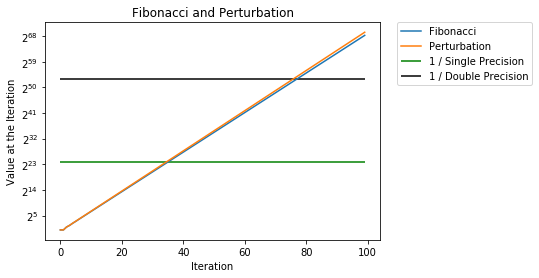

In [80]:
#Fibonacci Sequence
#Problem 8 of Lecture Notes from Jonathan Goodman “Principles of Scientific Computing
#Sources of Error” found in the NYU Classes website. Look in the Resources tab in the
#“Extra Lectures” folder.  Another separate explanation of computational error should also be useful.

import numpy as np
import matplotlib.pyplot as plt

#How many iterations to run
iteration = 100

#Fionacci
fibArr = np.zeros(iteration)
fibArr[0] = 1.0
fibArr[1] = 1.0

def fib(x):
    if(fibArr[x] != 0):
        return fibArr[x]
    fibArr[x] = fib(x-1) + fib(x-2)
    return fibArr[x]

#Perturbation
perArr = np.zeros(iteration)
perArr[0] = 1.0
perArr[1] = 1.0
c = 1.017320508075689

def per(x):
    if(perArr[x] != 0):
        return perArr[x]
    perArr[x] = (c * per(x-1)) + per(x-2)
    return perArr[x]

#Run both algorithims to fill the arrays
fib(iteration - 1)
per(iteration - 1)

#Plot "Fibonacci and Perturbation"
plt.plot(fibArr, label="Fibonacci")
plt.plot(perArr, label="Perturbation")
plt.hlines((1 / 5.96e-08), 0, 99, color="green", label="1 / Single Precision")
plt.hlines((1 / 1.11e-16), 0, 99, label="1 / Double Precision")
#plt.plot(5, 200, marker='o', markersize=3, label="Double Precision")
plt.yscale('log',basey=2)
plt.xlabel("Iteration")
plt.ylabel("Value at the Iteration")
plt.title("Fibonacci and Perturbation")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

This is a graph of the Fibonacci and Perturbation values. The perturbation values tend to be slightly higher than the Fibonacci but remain close.

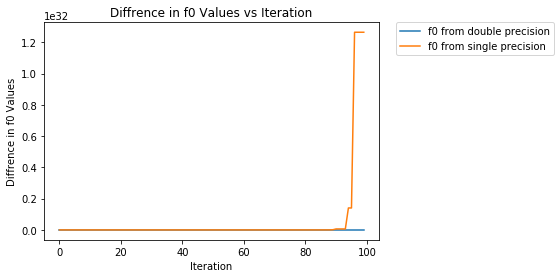

In [75]:
#Part 2, Rewrite fib to calculate backwards and plot difference in f0 for each starting n. Use double and single.
#Fionacci single precision
fibArr32 = np.zeros(iteration, np.float32)
fibArr32[0] = np.float32(1.0)
fibArr32[1] = np.float32(1.0)

def fib32(x):
    if(fibArr32[x] != np.float32(0)):
        return fibArr32[x]
    fibArr32[x] = fib32(x-1) + fib32(x-2)
    return fibArr32[x]
fib32(iteration - 1)

#Fibonacci backwards double precision
fibBackArr = np.zeros(iteration)
def fibBack(x):
    if(fibBackArr[x] != 0):
        return fibBackArr[x]
    fibBackArr[x] = fibBack(x+2) - fibBack(x+1)
    return fibBackArr[x]

fibf0 = np.zeros(iteration)
for i in range(1, iteration):
    fibBackArr = np.zeros(iteration)
    fibBackArr[iteration-i] = fibArr[iteration-i]
    fibBackArr[iteration-1-i] = fibArr[iteration-1-i]
    fibf0[iteration-i] = abs(fibBack(0) - fibArr[0])

#Fibonacci backwards single precision
fibBackArr = np.zeros(iteration, np.float32)
def fibBack32(x):
    if(fibBackArr[x] != np.float32(0)):
        return fibBackArr[x]
    fibBackArr[x] = fibBack32(x+2) - fibBack32(x+1)
    return fibBackArr[x]

fibf0_32 = np.zeros(iteration, np.float32)
for i in range(1, iteration):
    fibBackArr = np.zeros(iteration, np.float32)
    fibBackArr[iteration-i] = fibArr32[iteration-i]
    fibBackArr[iteration-1-i] = fibArr32[iteration-1-i]
    fibf0_32[iteration-i] = abs(fibBack32(0) - fibArr32[0])
    
#Ploting diffrence in f0
plt.figure(2)
plt.plot(fibf0, label="f0 from double precision")
plt.plot(fibf0_32, label="f0 from single precision")
plt.xlabel("Iteration")
plt.ylabel("Diffrence in f0 Values")
plt.title("Diffrence in f0 Values vs Iteration")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

fk+1 = fk + fk-1 would become fk-1 = fk+1 – fk and this can become fk = fk+2 – fk+1. The graph is the difference between the actual value of f0 and the one calculated backwards. The difference is 0 for both 32 and 64 bit for most of the graph. The 32 bit precision loses all accuracy after a starting point of about n=90. The 64 bit precision does not lose accuracy and tests (not shown) shows that an overflow occurs before a complete loss of accuracy.

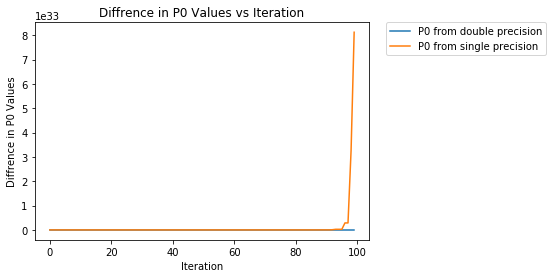

In [81]:
#Part 3, repeat part 2 for pib numbers.
#per single precision
perArr32 = np.zeros(iteration, np.float32)
perArr32[0] = np.float32(1.0)
perArr32[1] = np.float32(1.0)
c32 = np.float32(1.0173205)

def per32(x):
    if(perArr32[x] != np.float32(0.0)):
        return perArr32[x]
    perArr32[x] = (c32 * per32(x-1)) + per32(x-2)
    return perArr32[x]
per32(iteration-1)

#per backwards double precision
perBackArr = np.zeros(iteration)
def perBack(x):
    if(perBackArr[x] != 0.0):
        return perBackArr[x]
    perBackArr[x] = perBack(x+2) - (c * perBack(x+1))
    return perBackArr[x]

perf0 = np.zeros(iteration)
for i in range(1, iteration):
    perBackArr = np.zeros(iteration)
    perBackArr[iteration-i] = perArr[iteration-i]
    perBackArr[iteration-1-i] = perArr[iteration-1-i]
    perf0[iteration-i] = abs(perBack(0) - perArr[0])

#Fibonacci backwards single precision
perBackArr = np.zeros(iteration, np.float32)
def perBack32(x):
    if(perBackArr[x] != np.float32(0)):
        return perBackArr[x]
    perBackArr[x] = perBack32(x+2) - (c32 * perBack32(x+1))
    return perBackArr[x]

perf0_32 = np.zeros(iteration, np.float32)
for i in range(1, iteration):
    perBackArr = np.zeros(iteration, np.float32)
    perBackArr[iteration-i] = perArr32[iteration-i]
    perBackArr[iteration-1-i] = perArr32[iteration-1-i]
    perf0_32[iteration-i] = abs(perBack32(0) - perArr32[0])
    
#Ploting diffrence in f0
plt.figure(3)
plt.plot(perf0, label="P0 from double precision")
plt.plot(perf0_32, label="P0 from single precision")
plt.xlabel("Iteration")
plt.ylabel("Diffrence in P0 Values")
plt.title("Diffrence in P0 Values vs Iteration")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

Pk+1 = C Pk + Pk-1 would become Pk-1 = Pk+1 – c Pk and this can become Pk = Pk+2 – c Pk+1. The graph is the difference between the actual value of P0 and the one calculated backwards. The difference is 0 for both 32 and 64 bit for most of the graph. The 32 bit precision loses all accuracy after a starting point of about n=90. The 64 bit precision does not lose accuracy and tests (not shown) shows that an overflow occurs before a complete loss of accuracy. This is all similar to the Fibonacci graph excep the diffrence in single precision does not capp off here. Instead the single precision continuously increases here. This would be more typical because most functions do not have a meathod of capping the error as it becomes large and instead the error will continue to build.